In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import and check the data
battles = pd.read_csv('GOT_data/battles_cleaned.csv')
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        38 non-null     int64 
 1   name              38 non-null     object
 2   year              38 non-null     int64 
 3   attacker_king     38 non-null     object
 4   defender_king     38 non-null     object
 5   attacker_outcome  38 non-null     object
 6   attacker_size     38 non-null     int64 
 7   defender_size     38 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.5+ KB


In [3]:
battles.isnull().sum()

Unnamed: 0          0
name                0
year                0
attacker_king       0
defender_king       0
attacker_outcome    0
attacker_size       0
defender_size       0
dtype: int64

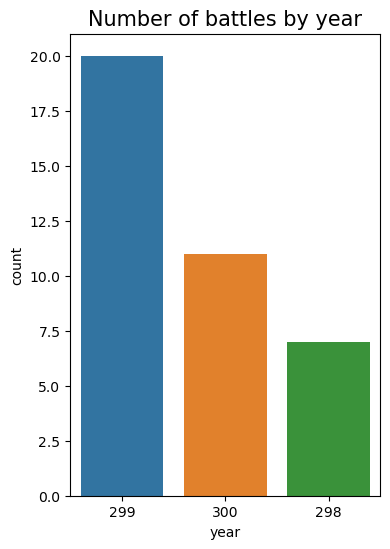

In [4]:
# Show the number of battles by year (bar chart)
plt.figure(figsize=(4, 6))
sns.countplot(x='year',order=battles['year'].value_counts().index[0:5],data=battles)
plt.title('Number of battles by year',fontsize=15)
plt.show()

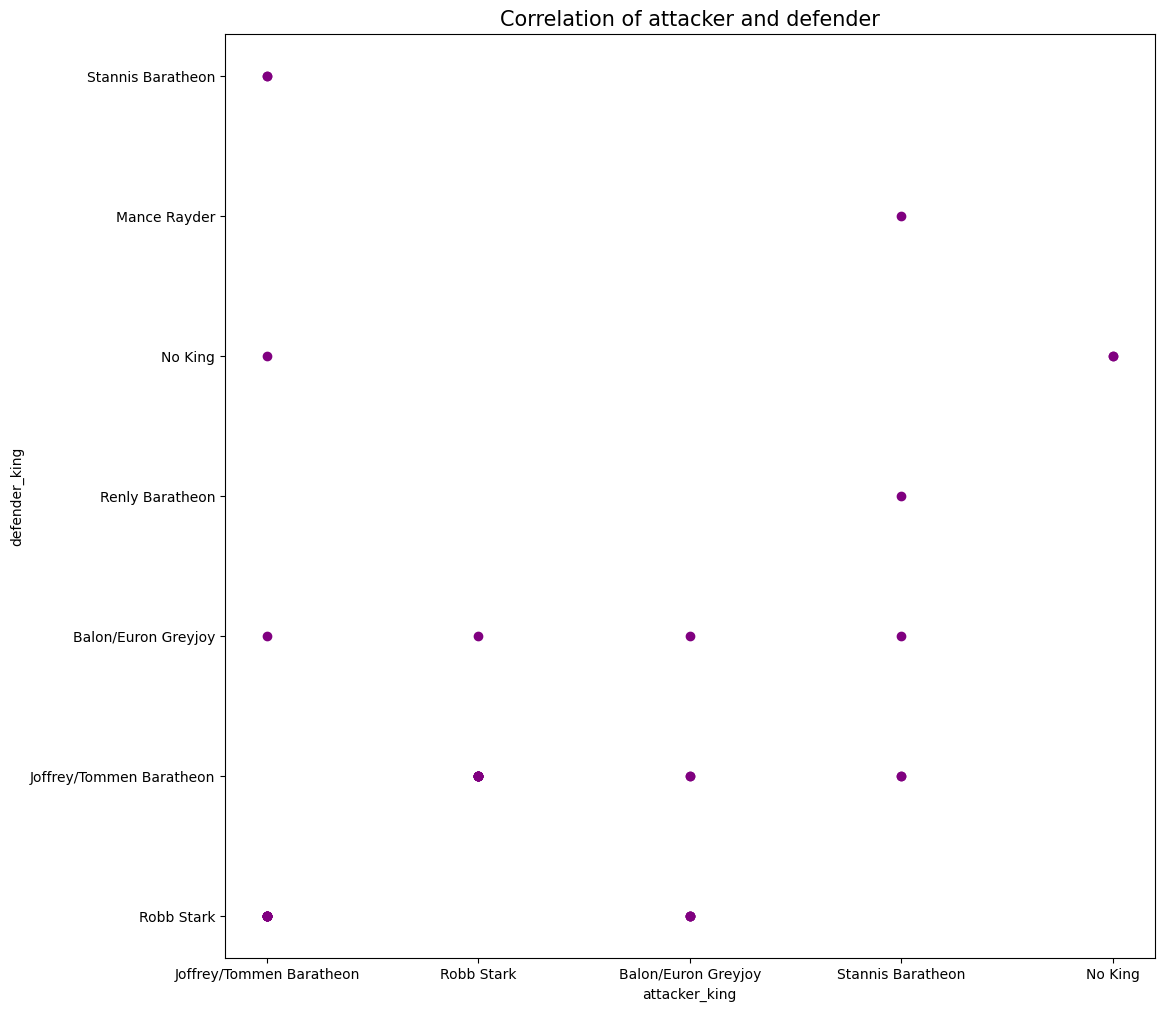

In [5]:
# Show the correlation of attacker and defender (scatter plot)
plt.figure(figsize=(12, 12))
plt.scatter(battles["attacker_king"], battles["defender_king"], c="purple")
plt.xlabel("attacker_king")
plt.ylabel("defender_king")
plt.title('Correlation of attacker and defender',fontsize=15)
plt.show()

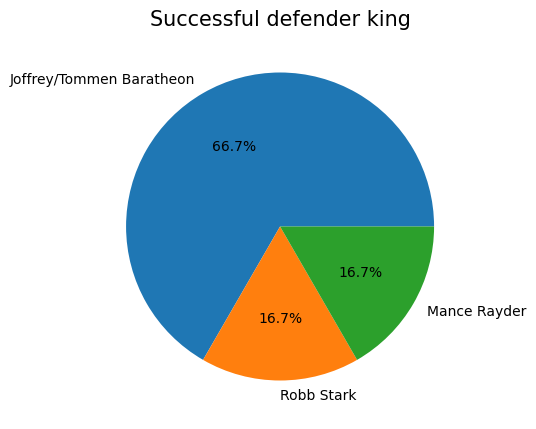

In [6]:
# Show the name of the king who defends successfullly (pie chart)
a=battles[battles['attacker_outcome']=='loss']
a=a['defender_king'].value_counts()
x=list(a.keys())
y=list(a)

plt.figure(figsize=(5,5))
plt.pie(y,labels=x,autopct='%0.1f%%')
plt.title('Successful defender king',fontsize=15)
plt.show()

C:\Users\zlal1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

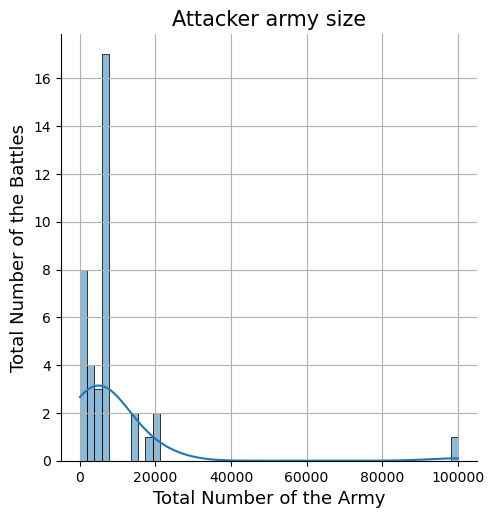

In [7]:
# Show the size of the attachker army (Histogram)
plt.figure(figsize=(8,6))
sns.displot(battles['attacker_size'],kde=True)
plt.title("Attacker army size",fontsize=15)
plt.ylabel('Total Number of the Battles',fontsize=13)
plt.xlabel('Total Number of the Army',fontsize=13)
plt.grid(True)
plt.show()

In [8]:
# Total number of winning by king (stacked bar column chart)
a=battles[battles['attacker_outcome']=='win']
a_counts=a['attacker_king'].value_counts()
a_counts

attacker_king
Joffrey/Tommen Baratheon    13
Robb Stark                   8
Balon/Euron Greyjoy          7
Stannis Baratheon            2
No King                      2
Name: count, dtype: int64

In [9]:
b=battles[battles['attacker_outcome']=='loss']
b_counts=b['defender_king'].value_counts()
b_counts

defender_king
Joffrey/Tommen Baratheon    4
Robb Stark                  1
Mance Rayder                1
Name: count, dtype: int64

In [10]:
total = a_counts.add(b_counts, fill_value=0)
total = total.astype(int)
total = total.sort_values(ascending=False)

print(total)

Joffrey/Tommen Baratheon    17
Robb Stark                   9
Balon/Euron Greyjoy          7
No King                      2
Stannis Baratheon            2
Mance Rayder                 1
Name: count, dtype: int32


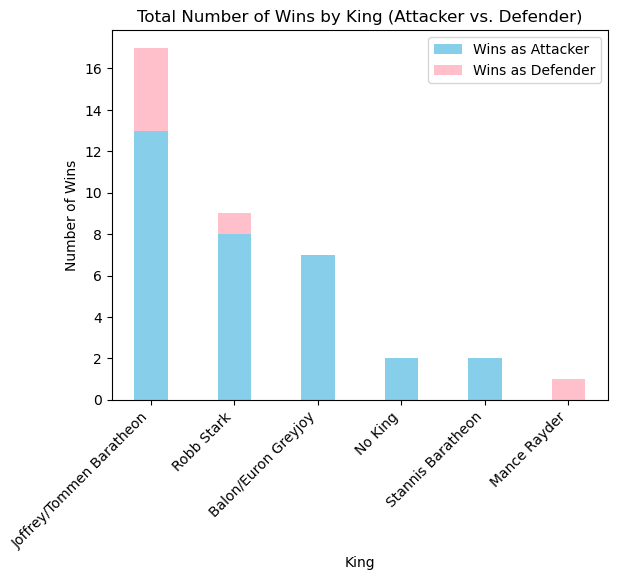

In [13]:
total_counts = a_counts.add(b_counts, fill_value=0)
combined_counts = pd.DataFrame({'Wins as Attacker': a_counts, 'Wins as Defender': b_counts}).sum(axis=1)

order = combined_counts.sort_values(ascending=False).index

bar_width = 0.4
bar_positions = np.arange(len(order))

plt.bar(bar_positions, a_counts.reindex(order, fill_value=0), color='skyblue', label='Wins as Attacker', width=bar_width)
plt.bar(bar_positions, b_counts.reindex(order, fill_value=0), bottom=a_counts.reindex(order, fill_value=0), color='pink', label='Wins as Defender', width=bar_width)

plt.title('Total Number of Wins by King (Attacker vs. Defender)')
plt.xlabel('King')
plt.ylabel('Number of Wins')
plt.legend()
plt.xticks(bar_positions, order, rotation=45, ha='right')  # Use ordered king names as x-axis ticks
plt.show()